In [24]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases_v3 import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward



%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


np.random.seed(1)


# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(1)

    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))

    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters    



def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)    
    
    m = layer_dims[0]
    
    for l in range(1, L):
        parameters['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b'+str(l)] = np.zeros((layer_dims[l], 1)) 
        
        assert(parameters['W'+str(l)].shape == layer_dims[l], layer_dims[l-1])
        assert(parameters['b'+str(l)].shape == (layer_dims[l], 1))


    return parameters
    
    
def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache


def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache


def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2

    
    for l in range(1, L):
        W = parameters['W'+str(l)]
        b = parameters['b'+str(l)]
        A, cache = linear_activation_forward(A, W, b, 'relu')
        assert(A.shape == (W.shape[0], A.shape[1]))
        caches.append(cache)
    
    W = parameters['W'+str(L)]
    b = parameters['b'+str(L)]
    AL, cache = linear_activation_forward(A, W, b, 'sigmoid')
    assert(AL.shape == (W.shape[0], A.shape[1]))
    caches.append(cache)
    
    return AL, caches
    
    
def compute_cost(AL, Y):

    m = Y.shape[1]
    cost = -np.sum(np.multiply(np.log(AL),Y) + np.multiply(np.log(1 - AL), 1 - Y)) / m

    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())

    return cost


def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1.0/m)*np.dot(dZ, A_prev.T)
    db = (1.0/m)*np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev, dW, db



def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db



def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    
    dAL = -(np.divide(Y, AL) - np.divide((1-Y), (1-AL)))
    grads['dA'+str(L-1)], grads['dW'+str(L)], grads['db'+str(L)] = linear_activation_backward(dAL, caches[L-1], 'sigmoid')
    
    for l in range(L-1, 0, -1):
        grads['dA'+str(l-1)], grads['dW'+str(l)], grads['db'+str(l)] = linear_activation_backward(grads['dA'+str(l)], caches[l-1], 'relu')
        
    return grads



def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    
    return parameters




parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))


W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


<ipython-input-24-d8ec46c5faf5>:53: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W'+str(l)].shape == layer_dims[l], layer_dims[l-1])


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)
Cost after iteration 0: 0.6930497356599888
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354664
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.4007977536203889
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.30527536361962637
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.24681768210614827
Cost after iteration 1400: 0.19850735037466102
Cost after iteration 1500: 0.17448318112556632
Cost after iteration 1600: 0.170807629780964
Cost after iteration 1700: 0.11306524562164724
Cost after iteration 1800: 0.09629426845937152
Cost after iteration 1900: 0.08342617959726863
Cost after iteration 2000: 

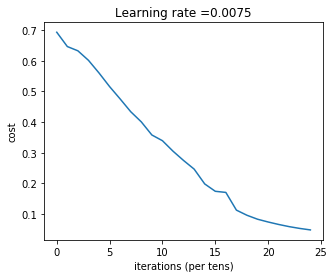

Accuracy: 0.9999999999999998
Accuracy: 0.72


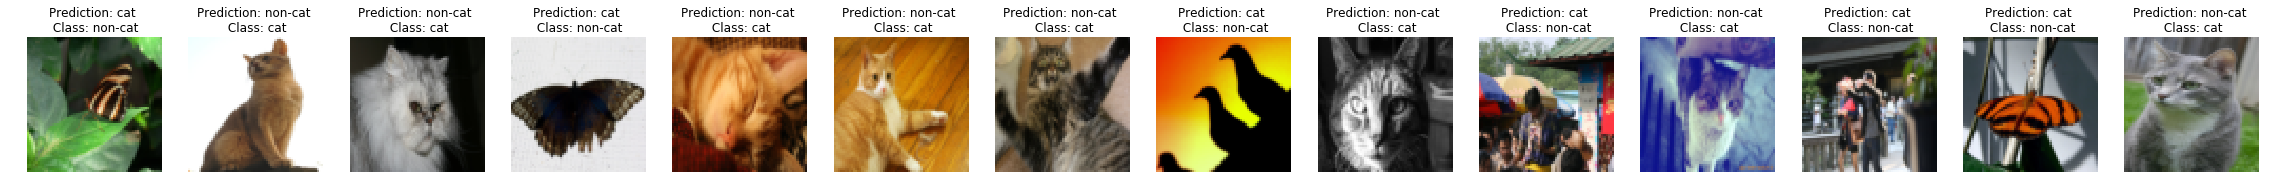

In [42]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

train_x_orig, train_y, test_x_orig, test_y, classes = load_data()


train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims

    parameters = initialize_parameters(n_x, n_h, n_y)
#     W1 = parameters["W1"]
#     b1 = parameters["b1"]
#     W2 = parameters["W2"]
#     b2 = parameters["b2"]


    for i in range(0, num_iterations):
#         A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
#         A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
#         cost = compute_cost(A2, Y)
#         dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))

#         dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
#         dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
#         grads['dW1'] = dW1
#         grads['db1'] = db1
#         grads['dW2'] = dW2
#         grads['db2'] = db2

#         parameters = update_parameters(parameters, grads, learning_rate)
#         W1 = parameters["W1"]
#         b1 = parameters["b1"]
#         W2 = parameters["W2"]
#         b2 = parameters["b2"]
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)


        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters


def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    np.random.seed(1)
    costs = []                         # keep track of cost

    parameters = initialize_parameters_deep(layers_dims)

    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters



def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))

    probas, caches = L_model_forward(X, parameters)

    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    print("Accuracy: "  + str(np.sum((p == y)/m)))

    return p







######## 2 Layers
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)
pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)





# ######### 5 Layers
# layers_dims = [12288, 20, 7, 5, 1]
# print(layers_dims)
# parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)
# pred_train = predict(train_x, train_y, parameters)
# pred_test = predict(test_x, test_y, parameters)

print_mislabeled_images(classes, test_x, test_y, pred_test)